<a href="https://colab.research.google.com/github/acrismail/churn_classificition/blob/main/churn_classificition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Veri Kümesi Hakkında
Bu veri seti, bir bankanın müşterilerinin ayrıntılarını içerir ve hedef değişken, müşterinin bankadan ayrıldığını (hesabını kapattığını) veya müşteri olmaya devam ettiğini gösteren ikili bir değişkendir.


## Variables:
RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Değişkenler:

RowNumber — kayıt (satır) numarasına karşılık gelir ve çıktı üzerinde hiçbir etkisi yoktur. Bu sütun kaldırılacak.

CustomerId — rastgele değerler içerir ve müşterinin bankadan ayrılması üzerinde hiçbir etkisi yoktur. Bu sütun kaldırılacak.

Soyadı — bir müşterinin soyadının bankadan ayrılma kararı üzerinde hiçbir etkisi yoktur. Bu sütun kaldırılacak.

Kredi Puanı — daha yüksek kredi puanına sahip bir müşterinin bankadan ayrılma olasılığı daha düşük olduğundan, müşteri kaybı üzerinde bir etkisi olabilir.

Coğrafya — müşterinin bulunduğu yer bankadan ayrılma kararını etkileyebilir. Bu sütunu tutacağız.

Cinsiyet — Bir müşterinin bankadan ayrılmasında cinsiyetin bir rol oynayıp oynamadığını keşfetmek ilginç. Bu sütuna da yer vereceğiz.

Yaş — bu kesinlikle önemlidir, çünkü daha yaşlı müşterilerin bankalarından ayrılma olasılığı daha genç olanlara göre daha düşüktür.

Görev süresi — müşterinin bankanın müşterisi olduğu yıl sayısını ifade eder. Normalde, daha yaşlı müşteriler daha sadıktır ve bir bankadan ayrılma olasılıkları daha düşüktür.

Bakiye — aynı zamanda müşteri kaybının çok iyi bir göstergesidir, çünkü hesaplarında daha yüksek bakiyesi olan kişilerin bankadan ayrılma olasılığı, daha düşük bakiyesi olanlara kıyasla daha düşüktür.

Ürün Sayısı — bir müşterinin banka aracılığıyla satın aldığı ürün sayısını ifade eder.

HasCrCard — bir müşterinin kredi kartı olup olmadığını gösterir. Kredi kartı olan kişilerin bankadan ayrılma olasılığı daha düşük olduğu için bu sütun da önemlidir. (0=Hayır,1=Evet)

IsActiveMember — aktif müşterilerin bankadan ayrılma olasılığı daha düşüktür, bu yüzden bunu koruyacağız. (0=Hayır,1=Evet)

Tahmini Maaş — dengede olduğu gibi, daha düşük maaşlı kişilerin daha yüksek maaşlılara kıyasla bankadan ayrılma olasılığı daha yüksektir.

Çıkıldı — müşterinin bankadan ayrılıp ayrılmadığı. Tahmin etmemiz gereken şey bu. (0=Hayır,1=Evet)

## Analysis Content 
* 1.[Python Libraries](#1)
* 2.[data loading](#2)
* 3.[EDA](#3)
* 4.[data Preprocessing](#4)
* 5.[Modelling](#5) 
* 6.[Randomforest](#6) 
* 7.[Xgboost](#7) 
* 8.[LGBM](#8) 
* 9.[Catboost](#9)
* 10.[Conclusion](#10)




<a id="1"></a>
## 1.Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [2]:
df=pd.read_csv("/content/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<a id="3"></a>
## 3.EDA

In [4]:
df.shape

(10000, 14)

In [5]:
# verisetimiz,10000 gözlem ve 14 öznitelikten oluşmaktadır.
# our data consists of 10000 observations and 14 attributes.

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

* işimize yaramayacak kolonları kaldıralım
* remove columns that won't work for us


In [7]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# information about structural features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Verisetimizde eksik değer yok,7 sayısal-2kategorik kolondan oluşuyor...
# There is no missing value in our dataset, it consists of 7 numeric-2categorical columns...


In [10]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


verisetimizde;kredi notu,yaş,görev süresi,bakiye,ürün sayısı,aktif üye durumu,tahmini maaş,kredi kartı olup olmadığı
durumlarından yola çıkarak müşterinin bankadan ayrılıp ayrılmadığını tahmin edeceğiz

In our dataset; credit score, age, tenure, balance, number of products, active member status, estimated salary, credit card
We will predict whether the customer has left the bank based on their situation.

In [ ]:
# kredi puanı en yüksek,en düşük 15 kişi
# 15 people with the highest credit score and the lowest


In [11]:
df.sort_values("CreditScore",ascending=False).head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
792,850,Germany,Female,48,6,111962.99,1,1,0,111755.80,0
4083,850,Spain,Female,45,4,114347.85,2,1,1,109089.04,0
4158,850,France,Female,38,0,106831.69,1,0,1,148977.72,0
4157,850,Spain,Male,62,5,0.00,2,1,1,180243.56,0
7413,850,Germany,Female,31,4,164672.66,1,0,1,61936.10,0
4141,850,Spain,Male,39,0,141829.67,1,1,1,92748.16,0
7470,850,Germany,Female,47,4,99219.47,2,1,1,122141.13,0
4104,850,France,Male,55,6,0.00,1,1,0,944.41,1
4071,850,Spain,Female,54,4,120952.74,1,1,0,66963.15,0
7371,850,France,Male,30,10,153972.89,2,1,0,62811.03,0


In [12]:
df.sort_values("CreditScore").head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8762,350,France,Female,60,3,0.00,1,0,0,113796.15,1
8723,350,France,Male,51,10,0.00,1,1,1,125823.79,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
9624,350,France,Female,40,0,111098.85,1,1,1,172321.21,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [ ]:
# yaşı en büyük ve en küçük müşterilere bakalım;
# let's look at the oldest and smallest customers;

In [ ]:
df.sort_values("Age",ascending=False).head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
2458,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
9309,678,Germany,Male,83,6,123356.63,1,0,1,92934.41,0
766,700,France,Female,82,2,0.00,2,0,1,182055.36,0
4931,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
7526,850,France,Female,81,1,0.00,2,1,1,59568.24,0


In [ ]:
df.sort_values("Age").head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3512,806,Spain,Male,18,3,0.00,2,1,1,86994.54,0
1678,570,France,Female,18,4,82767.42,1,1,0,71811.90,0
3517,771,Spain,Male,18,1,0.00,2,0,0,41542.95,0
9520,727,Germany,Female,18,2,93816.70,2,1,0,126172.11,0
2021,716,Germany,Female,18,3,128743.80,1,0,0,197322.13,0
9526,642,Germany,Male,18,5,111183.53,2,0,1,10063.75,0
746,844,France,Male,18,2,160980.03,1,0,0,145936.28,0
9029,594,Germany,Male,18,1,132694.73,1,1,0,167689.56,0
4716,646,France,Male,18,10,0.00,2,0,1,52795.15,0
7722,684,Germany,Male,18,9,90544.00,1,0,1,4777.23,0


In [ ]:
# görev süresi en fazla olan-en az olan;
# with the most-least tenure;

In [ ]:
df[df.Tenure==10]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
12,476,France,Female,34,10,0.00,2,1,0,26260.98,0
50,698,Germany,Male,44,10,116363.37,2,1,0,198059.16,0
67,735,Germany,Male,43,10,123180.01,2,1,1,196673.28,0
79,416,Germany,Female,41,10,122189.66,2,1,0,98301.61,0
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
...,...,...,...,...,...,...,...,...,...,...,...
9934,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9945,645,France,Male,44,10,0.00,2,0,1,166707.22,0
9950,625,Germany,Female,39,10,129845.26,1,1,1,96444.88,0
9956,520,France,Female,46,10,85216.61,1,1,0,117369.52,1


In [ ]:
#490 kişinin görev süresi 10 yılmış
#490 people's tenure was 10 years


In [ ]:
df[df.Tenure==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
35,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
57,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0
72,657,Spain,Female,37,0,163607.18,1,0,1,44203.55,0
127,625,Germany,Male,56,0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...
9793,772,Germany,Female,42,0,101979.16,1,1,0,90928.48,0
9799,653,France,Male,46,0,119556.10,1,1,0,78250.13,1
9843,646,Germany,Male,24,0,92398.08,1,1,1,18897.29,0
9868,718,France,Female,43,0,93143.39,1,1,0,167554.86,0


In [ ]:
# 413 kişi yeni başlamış
# 413 people just started


In [ ]:
# en yüksek-en düşük bakiyelere sahip kişilere bakalım;
# look at the people with the highest-lowest balances;


In [ ]:
df.sort_values("Balance",ascending=False).head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
1067,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
138,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
1533,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,592,France,Male,37,4,212692.97,1,0,0,176395.02,0


In [ ]:
df.sort_values("Balance",ascending=True).head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
5148,731,Spain,Male,70,3,0.0,2,1,1,141180.66,0
5143,646,Spain,Male,31,2,0.0,1,1,1,170821.43,1
5142,719,Spain,Female,48,5,0.0,2,0,0,78563.66,0
5141,774,Spain,Male,32,9,0.0,2,1,0,10604.48,0
5139,700,Spain,Male,47,4,0.0,1,1,0,121798.52,1
5138,850,France,Male,34,6,0.0,1,0,1,52796.31,0
5135,518,France,Male,40,4,0.0,2,0,1,194416.58,0
5152,585,Spain,Male,36,10,0.0,2,1,1,180318.60,0
5132,439,France,Female,66,9,0.0,1,1,0,65535.56,0


In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# 3 farklı milletten kişiler var,en çok fransa vatandaşı kayıtlı
# There are people of 3 different nationalities, most French citizens registered

In [ ]:
# bir takım işlemler yapalımm,bu gruplara göre;

In [13]:
df.groupby("Geography")["Balance"].mean()

Geography
France      62092.636516
Germany    119730.116134
Spain       61818.147763
Name: Balance, dtype: float64

In [14]:
df.groupby("Geography")["Balance"].max()

Geography
France     238387.56
Germany    214346.96
Spain      250898.09
Name: Balance, dtype: float64

In [ ]:
df.groupby("Geography")["Balance"].describe()

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,5014.0,62092.636516,64133.565524,0.00,0.00,62153.50,121444.8775,238387.56
Germany,2509.0,119730.116134,27022.006157,27288.43,102800.72,119703.10,137560.3800,214346.96
Spain,2477.0,61818.147763,64235.555208,0.00,0.00,61710.44,121056.6300,250898.09


In [15]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [19]:
#enfazla  4 ürün satın alınmış

In [20]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [21]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [22]:
# aktif müşteri sayısı 5151,aktif olmayan müşteri sayısı 4849

In [32]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [23]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
#bırakan sayısı çok daha fazla,demek ki genel olarak müşteriler memnun değil
#the number of quitters is much higher, which means that the customers in general are not satisfied

In [25]:
# sonuç olarak 7 kategorik değer ,4 sayısal değer var
# as a result there are 7 categorical values, 4 numeric values

<a id="4"></a>
## 4.Data preprocessing

In [26]:
#missing value query
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
#verisetimizde eksik değer yok
#there is no missing value in our dataset

In [28]:
# sayısal ve kategorik değerler için ayrı listeler oluşturalım
# create separate lists for numeric and categorical values

In [33]:
cat_list=[]
num_list=[]

for i in df.columns:
    unique_val=len(df[i].unique())
    
    if unique_val<12:
        cat_list.append(i)
    else:
        num_list.append(i)

In [34]:
cat_list

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [35]:
num_list

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [36]:
# 4 sayısal,7 kategorik değerler içim ayrı listeler oluşturduk
# We created separate lists for 4 numeric and 7 categorical values

In [37]:
#şimdi sayısal değişkenlerimizin dağılım durumlarına bakalım;
#now let's look at the distribution of our numerical variables;

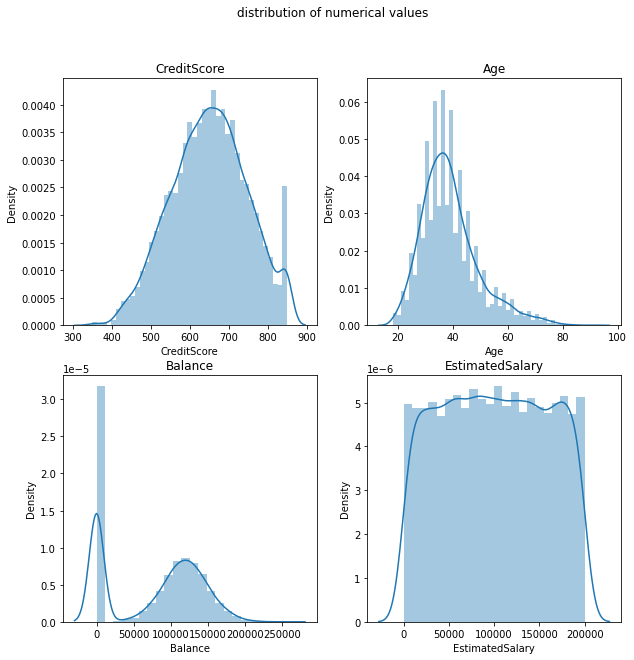

In [40]:
k=1
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in df.loc[:,num_list]:
  plt.subplot(2,2,k)
  sns.distplot(df[i])
  plt.title(i)
  k+=1

In [41]:
# Credit score un dağılımı normale yakın,diğer dağılımlar çarpık  durumda
# Distribution of credit score is close to normal, other distributions are skewed

In [42]:
# farklı bir teknik ile çarpıklık analizi yapalım;
# let's do a skewness analysis with a different technique;

In [43]:
from scipy.stats import jarque_bera

In [44]:
for i in df.loc[:,num_list]:
    stat,p=jarque_bera(df[i])
    print("stat=%.3f,p=%3f\n" %(stat,p))
    if p>0.05:
        print("Normal dağılım")
    else:
        print("Normal olmayan dağılım,çarpık dağılım")


stat=84.198,p=0.000000

Normal olmayan dağılım,çarpık dağılım
stat=2513.842,p=0.000000

Normal olmayan dağılım,çarpık dağılım
stat=957.308,p=0.000000

Normal olmayan dağılım,çarpık dağılım
stat=581.677,p=0.000000

Normal olmayan dağılım,çarpık dağılım


### Outlier Analysis

In [45]:
# tüm dağılımlar çarpık durumda,boxplot tekniği ile aykırı değer analizi yapalım;
# all distributions are skewed, let's do outlier analysis with boxplot technique;

In [46]:
for i in df.loc[:,num_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

CreditScore yes
Age yes
Balance no
EstimatedSalary no


In [47]:
# Credi skoru ve yaş değişkenlerin de aykırı değerler görünüyor,bunu direk gidermek yerine inceleyelim
# Credi score and age variables also show outliers, let's examine this instead of solving it directly

In [48]:
#öncelikle görselleştirelim;
#first let's visualize;

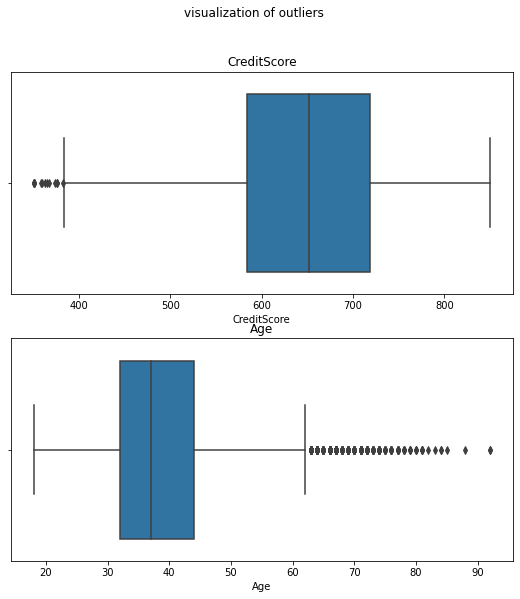

In [51]:
out_list=["CreditScore","Age"]


k=1
plt.figure(figsize=(9,9))
plt.suptitle("visualization of outliers")
plt.tight_layout()

for i in df.loc[:,out_list]:
  plt.subplot(2,1,k)
  sns.boxplot(df[i])
  plt.title(i)
  k+=1

In [52]:
#burada yaş değişkeni hakkında detaylı inceleme yapılabilir,ona göre giderlip giderilmediğine karar verilir
#here can be examined in detail about the age variable, it is decided whether it is resolved or not.

In [54]:
# for px boxplot;

px.box(df["Age"])

In [57]:
df[df.Age>62]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [58]:
#aykırı değeğrleri gidermeyelim,
#let's not remove outliers,

### Data Visualize

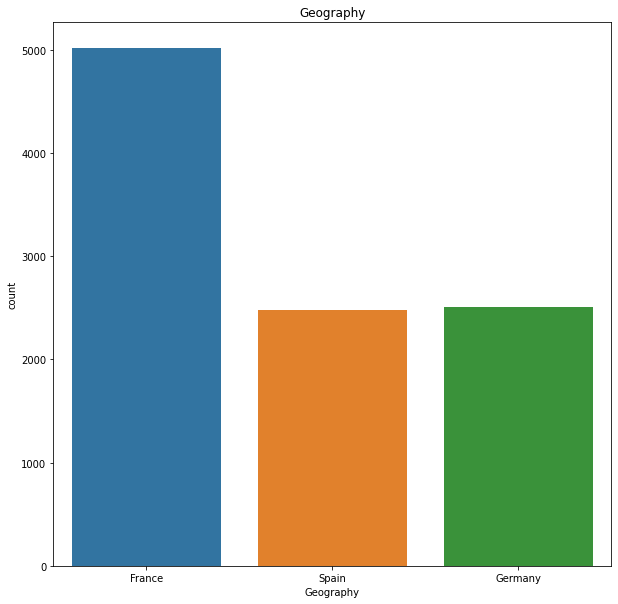

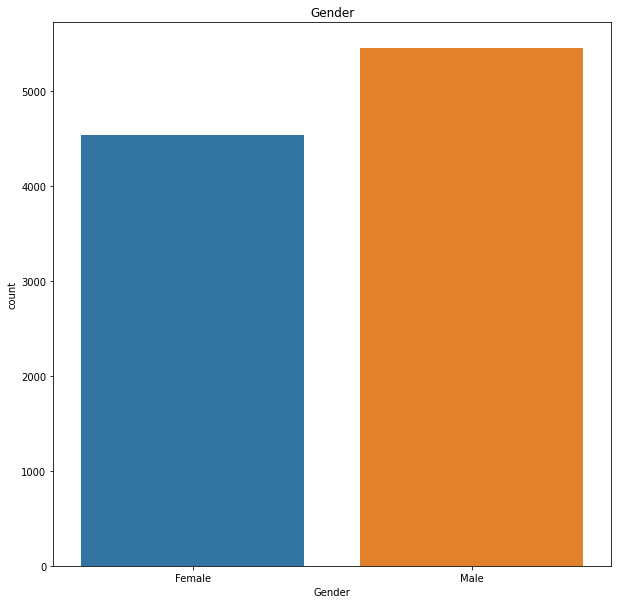

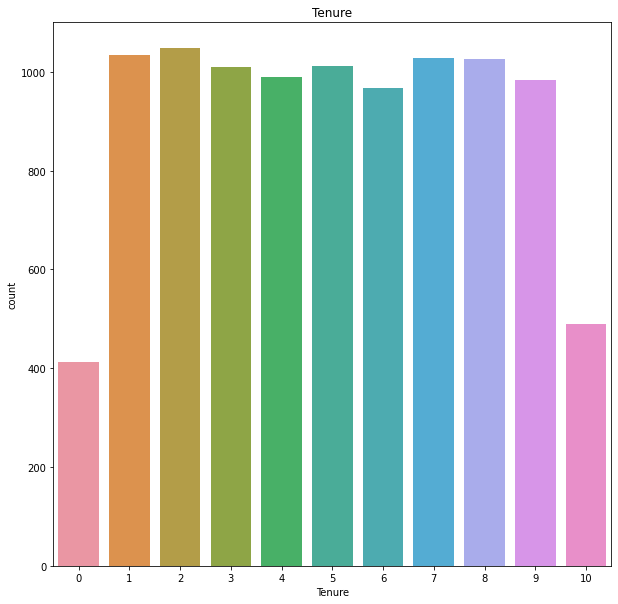

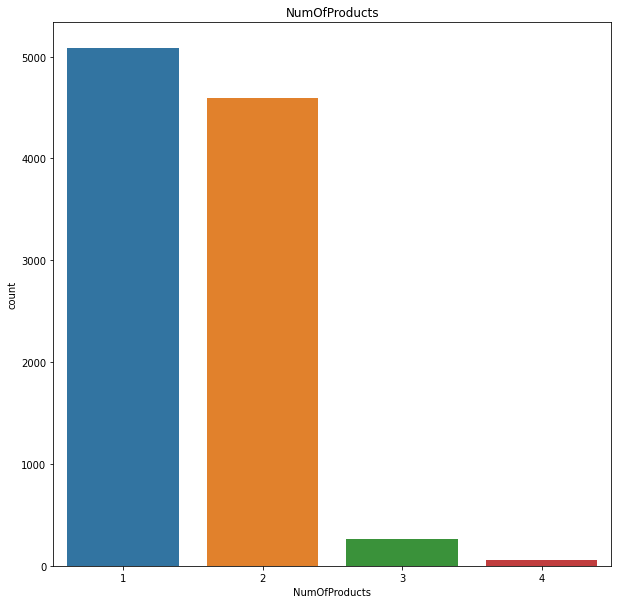

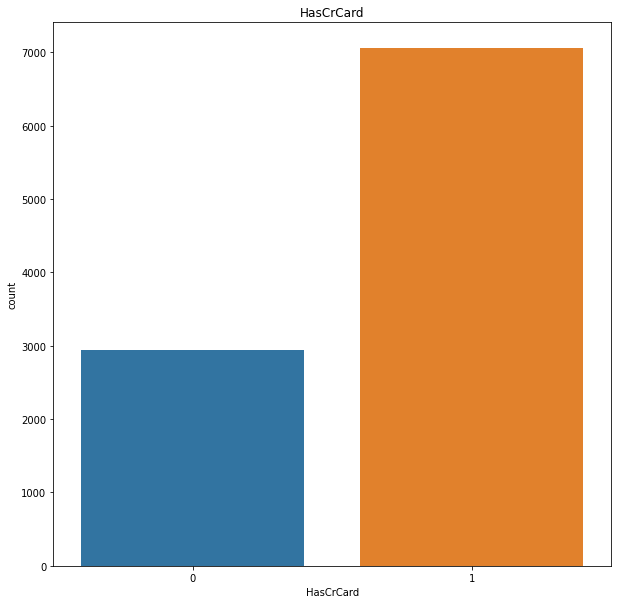

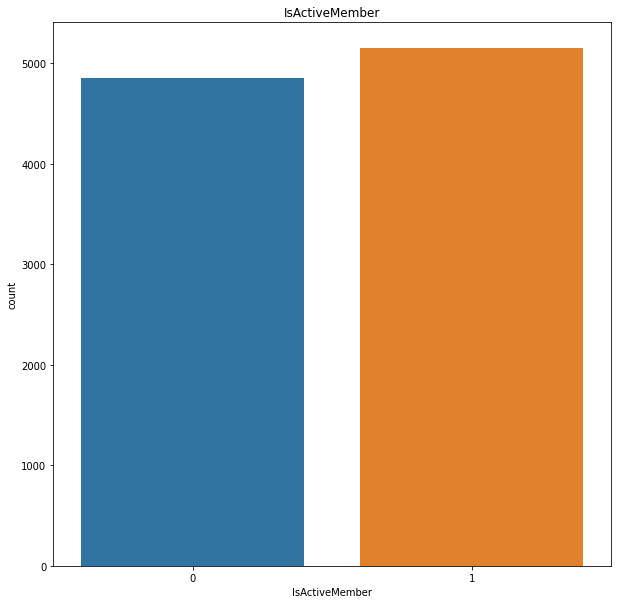

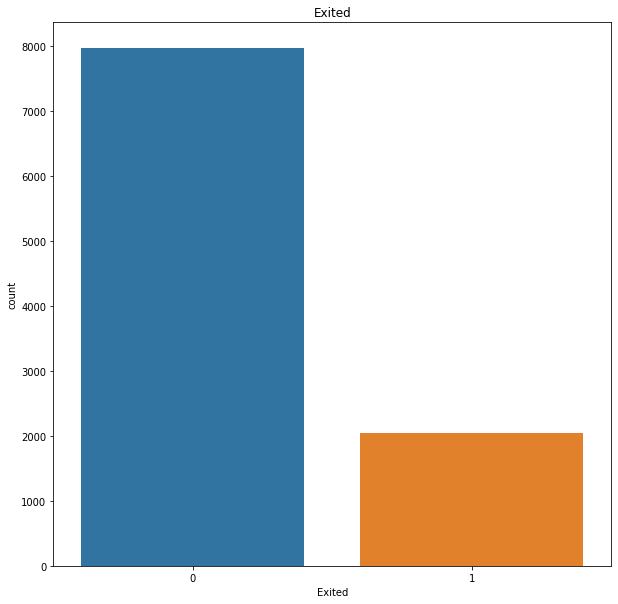

In [62]:
# Categorical Analysis;


for i in cat_list:
    
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)

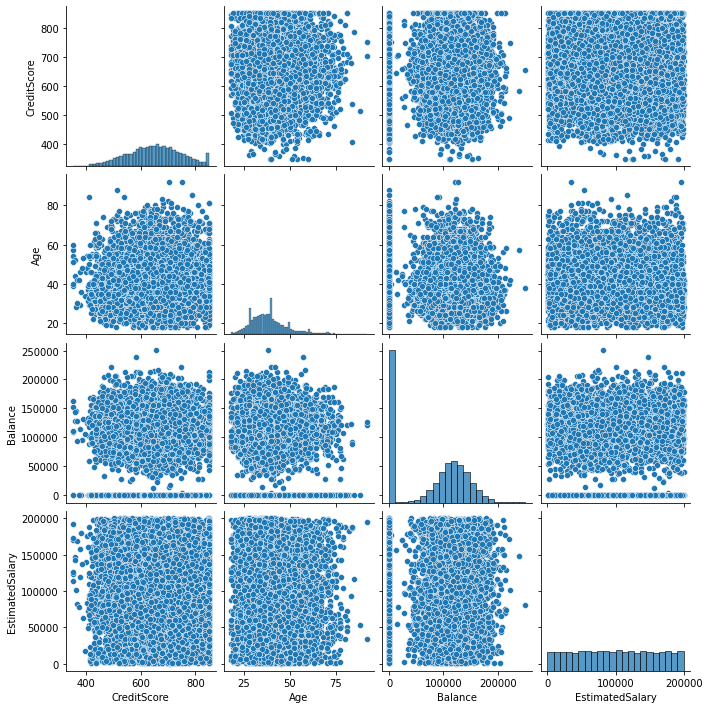

In [63]:
#numeric Analysis

sns.pairplot(df.loc[:,num_list])
plt.show()

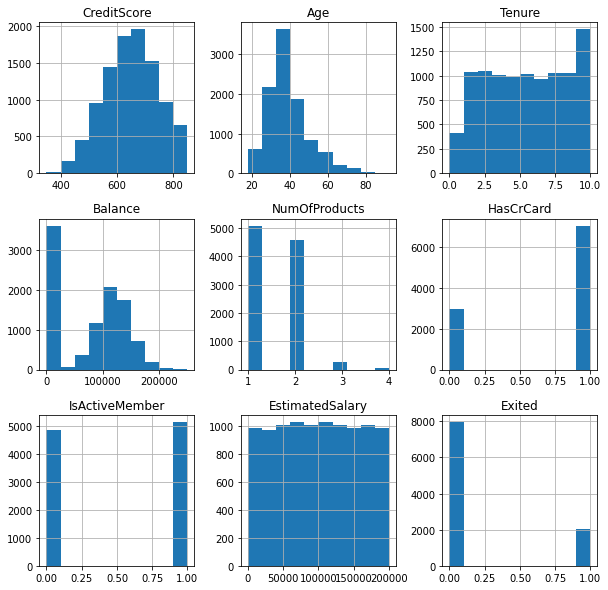

In [67]:
# histogram;
df.hist(figsize=(10,10));

In [69]:
num_list

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [70]:
cat_list

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

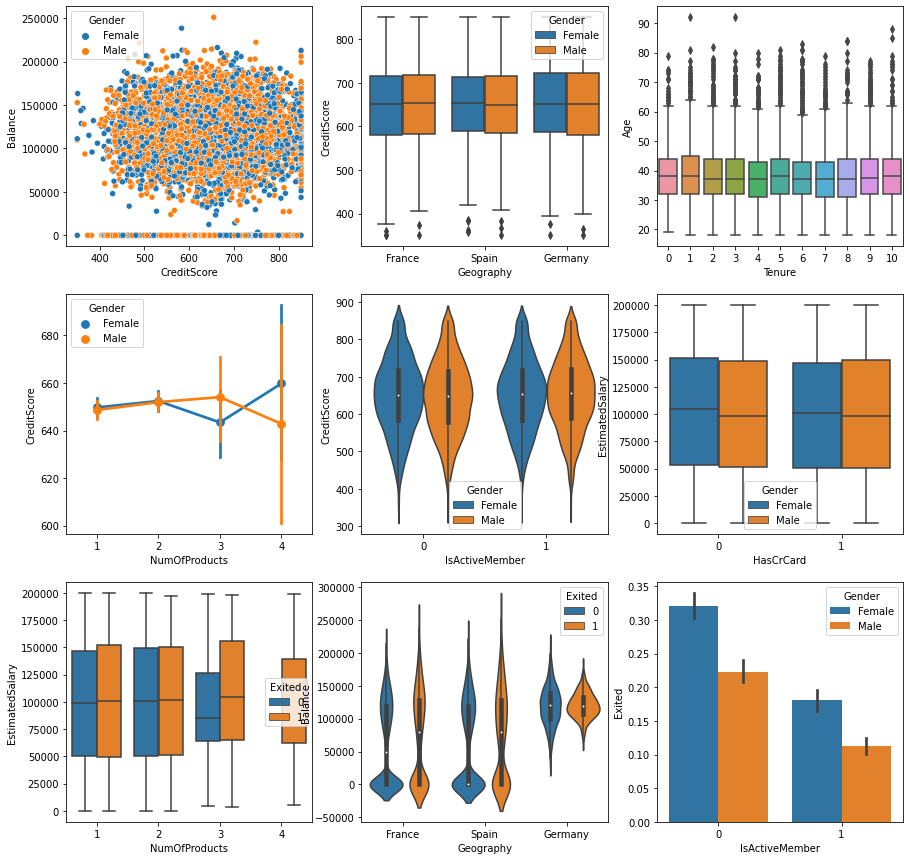

In [83]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='CreditScore',y ='Balance',hue="Gender",data = df)
plt.subplot(3,3,2)
sns.boxplot(x="Geography",y="CreditScore",hue="Gender",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="Tenure",y="Age",data=df)
plt.subplot(3,3,4)
sns.pointplot(x="NumOfProducts",y="CreditScore",hue="Gender",data=df)
plt.subplot(3,3,5)
sns.violinplot(x="IsActiveMember",y="CreditScore",hue="Gender",data=df)
plt.subplot(3,3,6)
sns.boxplot(x="HasCrCard",y="EstimatedSalary",hue="Gender",data=df)
plt.subplot(3,3,7)
sns.boxplot(x="NumOfProducts",y="EstimatedSalary",hue="Exited",data=df)
plt.subplot(3,3,8)
sns.violinplot(x="Geography",y="Balance",hue="Exited",data=df)
plt.subplot(3,3,9)
sns.barplot(x="IsActiveMember",y="Exited",hue="Gender",data=df)
plt.show()

In [84]:
#farklı grafik türleri ile özellikler hakkındaki ilişkiyi anlamaya çalıştık
#we tried to understand the relationship between different chart types and features

### Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [88]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [89]:
df["N_Geography"]=le.fit_transform(df["Geography"])
df["N_Gender"]=le.fit_transform(df["Gender"])

cinsiyeti erkek olanları 1 e,kadın olanları 0 a etiketledi,Milleti Fransa olanları 0,Almanya olanları 1,İspanya olanları 2 ye etiketledi
özellikleri numerik değerlere dönüştürdüğümüze göre,Şimdi ilk durumdaki özellikleri silelim


Those with gender tagged as 1, those with female tagged 0, those with French nationality tagged 0, those with Germany tagged 1, and those with Spain tagged 2.
Now that we have converted the properties to numeric values, now let's delete the properties in the first case

In [93]:
df.drop(["Geography","Gender"],axis=1,inplace=True)

In [94]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,N_Geography,N_Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [95]:
#sayısal olmayan öznitelikleri kaldırmış olduk

### Corelation Analysis

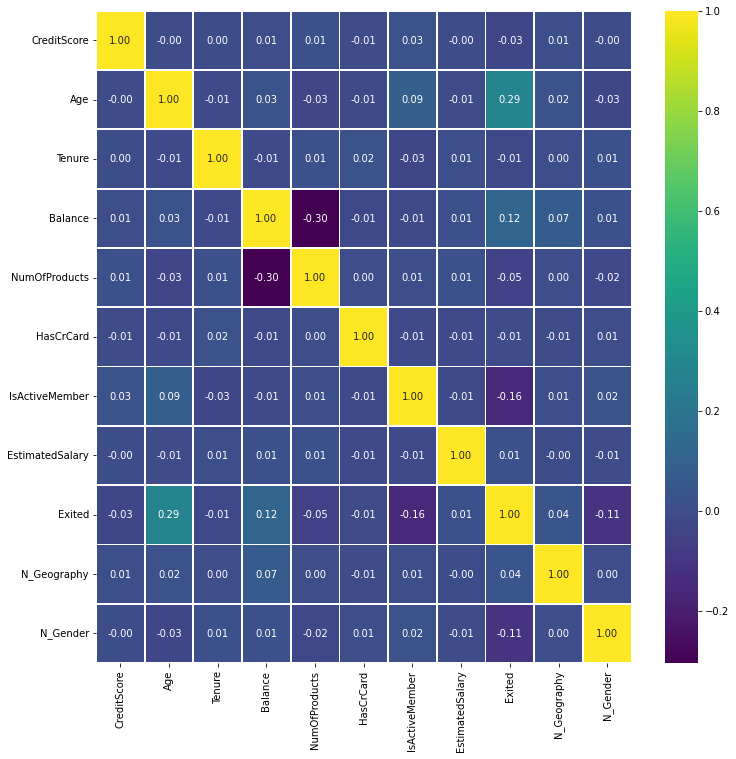

In [96]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="viridis")
plt.show()

In [97]:
# yüksek korelasyon değeri yok
# no high correlation value

In [98]:
#Exited için korelasyonlara bakalım(hangisi daha çok etki ediyor)
#Let's look at the correlations for #Exited (which one has more impact)

In [101]:
df.corr()["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
N_Geography        0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
N_Gender          -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [102]:
cor=df.corr()["Exited"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with a":cor.values})

,column,Correlation with a
0,Exited,1.000000
1,Age,0.285323
2,Balance,0.118533
3,N_Geography,0.035943
4,EstimatedSalary,0.012097
5,HasCrCard,-0.007138
6,Tenure,-0.014001
7,CreditScore,-0.027094
8,NumOfProducts,-0.047820
9,N_Gender,-0.106512


In [103]:
#müşterinin bankadan ayrulıp ayrılmama durumuna en çok etki eden yaş değişkeni
#The age variable that has the most impact on whether the customer leaves the bank or not

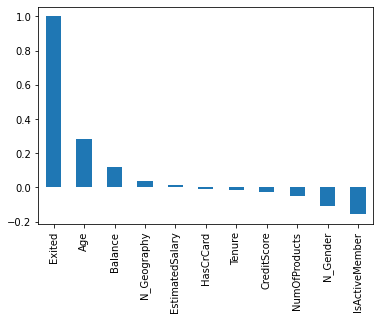

In [104]:
df.corr()["Exited"].sort_values(ascending=False).plot(kind="bar")

<a id="5"></a>
## 5.Modelling


In [105]:
X=df.drop("Exited",axis=1)   #bağımsız değişkenler
y=df["Exited"]  # bağımlı değişkenler


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
!pip install catboost

In [ ]:
!pip install lightgbm


In [ ]:
!pip install xgboost

* lazz predict yöntemi ile modellerin başarı oranlarını karşılaştıralım;

* Let's compare the success rates of the models with the lazz predict method;

In [ ]:
!pip install lazypredict

In [111]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [ ]:
clf= LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [113]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.87,0.74,0.74,0.86,0.21
AdaBoostClassifier,0.86,0.73,0.73,0.85,0.66
RandomForestClassifier,0.87,0.73,0.73,0.86,0.97
XGBClassifier,0.87,0.73,0.73,0.86,0.44
ExtraTreesClassifier,0.86,0.73,0.73,0.85,0.71
BaggingClassifier,0.85,0.72,0.72,0.84,0.73
DecisionTreeClassifier,0.80,0.70,0.70,0.80,0.15
NearestCentroid,0.69,0.70,0.70,0.72,0.02
SVC,0.86,0.69,0.69,0.84,1.44


In [114]:
# listede catboost yok kategorik değer sayımız fazla olduğu için onada bakalım el yordamıyla;
# there is no catboost in the list, since we have a large number of categorical values, let's look at it manually;

In [115]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [ ]:
catb=CatBoostClassifier().fit(X_train,y_train)

In [117]:
y_pred=catb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8656666666666667

In [122]:
#%86,56 oranında bir başarı oranı verdi

In [119]:
#şimdi başarı oranları yüksek olan bir kaç model için optimizasyon işlemi yapalım
#now let's do optimization for a few models with high success rates

In [ ]:
!pip install optuna

In [124]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

<a id="6"></a>
## 6.Random Forest

In [155]:
def return_score(param):
    model=RandomForestClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [156]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",20,1000),
        "criterion":trial.suggest_categorical("criterion",["gini","entropy"]),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_samples_split":trial.suggest_int("min_samples_split",2,20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,20)
    }
    
    return(return_score(param))

In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=200)

In [161]:
trial=study.best_trial
print("accuary:{}".format(trial.value))

accuary:0.8706666666666667


In [162]:
trial.params

{'n_estimators': 337,
 'criterion': 'gini',
 'max_depth': 14,
 'min_samples_split': 14,
 'min_samples_leaf': 3}

In [163]:
rf_best_params=trial.params
rf_best_params

{'n_estimators': 337,
 'criterion': 'gini',
 'max_depth': 14,
 'min_samples_split': 14,
 'min_samples_leaf': 3}

In [130]:
#başarı oranımız arttı

In [131]:
optuna.visualization.plot_param_importances(study)

In [132]:
optuna.visualization.plot_slice(study)

In [133]:
optuna.visualization.plot_optimization_history(study)

<a id="7"></a>
## 7.XGBOOST

In [134]:
def return_score(param):
    model=XGBClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [136]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",0,500),
        "max_depth":trial.suggest_int("max_depth",2,10),
        "reg_alpha":trial.suggest_uniform("reg_alpha",0,6),
        "reg_lambda":trial.suggest_uniform("reg_lambda",0,2),
        "gamma":trial.suggest_uniform("gamma",0,5),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.5),
        "colsample_bytree":trial.suggest_uniform("colsample_bytree",0.4,0.9),
        "subsample":trial.suggest_uniform("subsample",0.4,0.9)
    }
    return(return_score(param))

In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=200)

In [138]:
trial=study.best_trial
print("accuary:{}".format(trial.value))

accuary:0.87


In [139]:
optuna.visualization.plot_param_importances(study)

<a id="8"></a>
## 8.LGBM

In [140]:
def return_score(param):
    model=LGBMClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [141]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",10,1000),
        "num_leaves":trial.suggest_int("num_leaves ",2,50),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_child_samples":trial.suggest_int("min_child_samples",1,50),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,20),
        'lambda_l2': trial.suggest_loguniform('lambda_l2',0.1,2),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 2),
        "criterion":trial.suggest_categorical("criterion",['friedman_mse','squared_error','mse']),

                

    }
    
    return(return_score(param))

In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=500)

In [143]:
trial=study.best_trial
print("accuary:{}".format(trial.value))

accuary:0.8703333333333333


In [144]:
study.best_params

{'n_estimators': 151,
 'num_leaves ': 9,
 'max_depth': 15,
 'min_child_samples': 16,
 'learning_rate': 0.07114298847898606,
 'min_samples_leaf': 9,
 'lambda_l2': 0.3772340497439078,
 'lambda_l1': 1.783098265742798,
 'criterion': 'friedman_mse'}

In [145]:
optuna.visualization.plot_param_importances(study)

In [146]:
#son olarak Catboostu deneyelim(çok sayıda kategorik değerimiz olduğu için)
#finally let's try Catboost (since we have a lot of categorical values)

<a id="9"></a>
## 9.Catboost

In [147]:
def return_score(param):
    model=CatBoostClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [148]:
def objective(trial):
    param={
        "iterations":trial.suggest_int("n_estimators",10,1000),
        "depth":trial.suggest_int("max_depth",2,16),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.01,0.5),


    }
    
    return(return_score(param))

In [ ]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=150)

In [150]:
trial=study.best_trial
print("accuary:{}".format(trial.value))

accuary:0.8696666666666667


In [151]:
study.best_params

{'n_estimators': 297, 'max_depth': 5, 'learning_rate': 0.055830018503543855}

In [152]:
optuna.visualization.plot_param_importances(study)

In [153]:
# en yüksek başarı oranını Random Forest verdi,random forest ile tahmin işlemi yapalım;
# Random Forest gave the highest success rate, let's guess with random forest;

### Predict

In [167]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,N_Geography,N_Gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


In [164]:
rf_tun=RandomForestClassifier(**rf_best_params).fit(X_train,y_train)

In [169]:
predictclas1=[[770,27,2,55250,2,1,1,50000,0,1]]
rf_tun.predict(predictclas1)


array([0])

In [171]:
#uyruğu Fransa,cinsiyeti erkek olan birisi için rastgele değerler girerek tahmin işlemi gerçekleştirdik
#We performed a guessing process by entering random values ​​for someone whose nationality is France, and the gender is male.

<a id="10"></a>
## 10.Conclusion

Çeşitli öznitelikteki değişimlerden yola çıkarak bir bankanın müşteri kaybını analiz ettik,daha sonra en yüksek başarı oranını veren modelimizi (rf:%87.06) oluşturarak tahmin işlemi gerçekleştirdik
Verisetimiz;10668 gözlem ve 14 özellikten oluşmaktadır.

Based on the changes in various attributes, we analyzed the loss of customers of a bank, then we created our model that gives the highest success rate (rf: 87.06%) and performed the prediction process.
Our dataset consists of 10668 observations and 14 features.